# Introducción a las Bases de Datos Relacionales

- ¿Qué es una base de datos relacional?
- SQLite, una base de datos local
- Tablas
- Consultas
- Filtros
- Agregación

## Bases de Datos Relacionales

[Artículo en Wikipedia](https://es.wikipedia.org/wiki/Base_de_datos_relacional)

- "La base de datos relacional (BDR) es un tipo de base de datos (BD) que cumple con el modelo relacional (el modelo más utilizado actualmente para implementar las BD ya planificadas). Tras ser postuladas sus bases en 1970 por Edgar Frank Codd, de los laboratorios IBM en San José (California), no tardó en consolidarse como un nuevo paradigma en los modelos de base de datos."


- "Un sistema de software utilizado para mantener las bases de datos relacionales es un relational database management system (RDBMS) o sistema de gestión de bases de datos relacionales. Virtualmente, todos los sistemas de bases de datos relacionales utilizan SQL (Structured Query Language) para consultar y mantener la base de datos."

## Principales Características de una BBDD Relacional

- Una base de datos se compone de varias tablas, denominadas también relaciones.


- No pueden existir dos tablas con el mismo nombre.


- Cada tabla es a su vez un conjunto de campos (columnas) y registros (filas).


- Se puede establecer una relación entre una tabla madre y una tabla hija. Ésta se lleva a cabo por medio de las llaves primarias y llaves foráneas.


- Las llaves primarias son la clave principal de un registro dentro de una tabla y deben cumplir con la integridad de datos (se verá).


- Las llaves foráneas se colocan en la tabla hija, contienen el mismo valor que la llave primaria del registro padre; por medio de éstas se hacen las formas relacionales.

## SQLite, una BBDD Relacional Local

[SQLite home](https://www.sqlite.org/index.html)

"SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine. SQLite is the most used database engine in the world. SQLite is built into all mobile phones and most computers and comes bundled inside countless other applications that people use every day."

La data de una base de datos SQLite se almacena como un archivo local en el sistema.

En el directorio `./data` se encuentra el archivo *northwind.db* que contiene la BBDD Northwind originalmente proporcionada por Microsoft junto a Microsoft Access. Esta BBDD se utilizaba como introducción a las bases de datos y sigue siendo bastante utilizada en ese contexto.

### Conexión a la BBDD

In [2]:
import sqlite3

En este caso la extensión del archivo es *db*, pero puede ser cualquiera.

In [3]:
conn = sqlite3.connect('data/northwind.db')

Vemos el tipo del objeto obtenido.

In [4]:
conn

### Enviar Comandos a la BBDD

Para enviar comandos a la BD Se debe crear un objeto de tipo `cursor`. Los comandos son los que usualmente se conocen como operaciones CRUD:

- CREATE: crear una tabla
- READ: leer uno o varios registros de una o más tablas
- UPDATE: actualizar los valores de un registro
- DELETE: borrar tablas o registros de una tabla

In [5]:
cursor = conn.cursor()

#### Tablas de la BBDD

In [7]:
qry = "SELECT * FROM sqlite_master" # instrucción en SQL

La variable anterior es un comando en SQL (structured query language). 

SQL es un lenguaje *declarativo*, su sintaxis expresa lo que se quiere lograr y no cómo lograrlo. Python, en cambio, es un lenguaje *imperativo* su sintaxis expresa cómo realizar una tarea.

En la instrucción SQL anterior `sqlite_master` es una tabla y `*` indica que quiero obtener todos los campos. Sumando ambas partes, la instrucción equivale a decir: *quiero todos los campos de todos los registros de la tabla `sqlite_master`*.

Podemos ejecutar el comando con el objeto `cursor`.

In [8]:
result = cursor.execute(qry)

In [9]:
print(type(result))

<class 'sqlite3.Cursor'>


El objeto `cursor` almacena varias cosas después de haber ejecutado la *query*. Con la siguiente instrucción se obtienen los nombres de las columnas de la tabla `sqlite_master`.

In [10]:
nombres = [description[0] for description in result.description]

In [11]:
nombres

['type', 'name', 'tbl_name', 'rootpage', 'sql']

El resultado en sí de la query (los registros obtenidos) lo vemos con el siguiente `loop`:

In [12]:
for i, row in enumerate(result):
    print(row)
    print()
    if i > 10: break

('table', 'Categories', 'Categories', 2, 'CREATE TABLE [Categories]\n(      [CategoryID] INTEGER PRIMARY KEY AUTOINCREMENT,\n       [CategoryName] TEXT,\n       [Description] TEXT,\n       [Picture] BLOB\n)')

('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')

('table', 'CustomerCustomerDemo', 'CustomerCustomerDemo', 28, 'CREATE TABLE [CustomerCustomerDemo](\n   [CustomerID]TEXT NOT NULL,\n   [CustomerTypeID]TEXT NOT NULL,\n   PRIMARY KEY ("CustomerID","CustomerTypeID"),\n   FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n\tFOREIGN KEY ([CustomerTypeID]) REFERENCES [CustomerDemographics] ([CustomerTypeID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)')

('index', 'sqlite_autoindex_CustomerCustomerDemo_1', 'CustomerCustomerDemo', 29, None)

('table', 'CustomerDemographics', 'CustomerDemographics', 30, 'CREATE TABLE [CustomerDemographics](\n   [CustomerTypeID]TEXT NOT NULL,\n  

Finalmente, obtengamos los nombres de todas las tablas de la BBDD.

In [13]:
qry = "SELECT name FROM sqlite_master WHERE type = 'table'"

Esta instrucción significa: *quiero el campo `name` de la tabla `sqlite_master`, pero sólo de los registros cuyo campo `type` sea igual a `'table'`.*

In [14]:
result = cursor.execute(qry)

##### Todos los Nombres

In [15]:
for row in result:
    print(row)

('Categories',)
('sqlite_sequence',)
('CustomerCustomerDemo',)
('CustomerDemographics',)
('Customers',)
('Employees',)
('EmployeeTerritories',)
('Order Details',)
('Orders',)
('Products',)
('Regions',)
('Shippers',)
('Suppliers',)
('Territories',)


#### Contenido de una Tabla

Ya que conocemos los nombres de las tablas, podemos investigarlas. Vamos a buscar los todos los campos de la tabla `Categories`, pero sólo un registro.

In [17]:
qry = "SELECT * FROM Categories LIMIT 1"

In [22]:
result = cursor.execute(qry)

In [23]:
print([d[0] for d in result.description])

['CategoryID', 'CategoryName', 'Description', 'Picture']


In [24]:
store = result.fetchall()
store

[(1,
  'Beverages',
  'Soft drinks, coffees, teas, beers, and ales',
  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00P\x00\x00\xff\xee\x00&Adobe\x00d\xc0\x00\x00\x00\x01\x03\x00\x15\x04\x03\x06\n\r\x00\x00\nc\x00\x00\x10\xe8\x00\x00\x19\xf4\x00\x00\'\xa4\xff\xdb\x00\x84\x00\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x04\x03\x02\x02\x03\x04\x05\x04\x04\x04\x04\x04\x05\x06\x05\x05\x05\x05\x05\x05\x06\x06\x07\x07\x08\x07\x07\x06\t\t\n\n\t\t\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\x03\x03\x03\x05\x04\x05\t\x06\x06\t\r\x0b\t\x0b\r\x0f\x0e\x0e\x0e\x0e\x0f\x0f\x0c\x0c\x0c\x0c\x0c\x0f\x0f\x0c\x0c\x0c\x0c\x0c\x0c\x0f\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc2\x00\x11\x08\x00n\x00\xaf\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\xe8\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x03

El campo `Picture` es un `blob`, o sea un objeto en formato binario, que en este caso es una imagen. En la siguiente celda se muestra el código para desplegar la imagen.

`````{admonition} Usando ChatGPT ...
:class: tip
Este código se obtuvo utilizando el siguiente prompt en ChatGPT:

"I have an image saved as a blob field in a SQLite table. I would like to display the image in a Jupyter notebook by reading the blob. Do you know how I can accomplish that using Python?"
`````

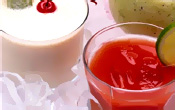

In [26]:
from IPython.display import display
from PIL import Image
import io

image_data = store[0][3]
image = Image.open(io.BytesIO(image_data))
display(image)

Busquemos sólo los campos que no son `blob`.

In [27]:
qry = "SELECT CategoryID, CategoryName, Description FROM Categories"

In [28]:
rows = cursor.execute(qry).fetchall()
for row in rows:
    print(row)

(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales')
(2, 'Condiments', 'Sweet and savory sauces, relishes, spreads, and seasonings')
(3, 'Confections', 'Desserts, candies, and sweet breads')
(4, 'Dairy Products', 'Cheeses')
(5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal')
(6, 'Meat/Poultry', 'Prepared meats')
(7, 'Produce', 'Dried fruit and bean curd')
(8, 'Seafood', 'Seaweed and fish')


### Llave Única

Fijémonos específicamente en el campo `CategoryID`. Para conocer la estructura de la tabla `Categories` volvemos a consultar la tabla `sqlite_master` y vemos el contenido del campo `sql` del registro correspondiente.

In [31]:
qry = "SELECT sql FROM sqlite_master WHERE name = 'Categories'"
rows = cursor.execute(qry).fetchall()
print(rows[0][0]) # rows es [(un_elemento,)]

CREATE TABLE [Categories]
(      [CategoryID] INTEGER PRIMARY KEY AUTOINCREMENT,
       [CategoryName] TEXT,
       [Description] TEXT,
       [Picture] BLOB
)


El comando que creó la tabla `Categories` estableció que el campo `CategoryID` es una llave única o primaria, que corresponde a un campo único que permite identificar de forma unívoca un registro. Es como una huella digital del registro, dos o más registros **NO** pueden compartir una llave primaria.

En el caso de la tabla `Categories` la llave primaria es un campo entero que se asigna automáticamente cada vez que se inserta un nuevo registro (`AUTOINCREMENT`), sin embargo, cualquier campo que sea único, puede ser una llave primaria.

### Llaves Foráneas

Hagamos el mismo ejercicio con la tabla `Products`.

In [32]:
qry = "SELECT * FROM Products LIMIT 1"

In [33]:
result = cursor.execute(qry)
print([d[0] for d in result.description])

['ProductID', 'ProductName', 'SupplierID', 'CategoryID', 'QuantityPerUnit', 'UnitPrice', 'UnitsInStock', 'UnitsOnOrder', 'ReorderLevel', 'Discontinued']


In [34]:
for row in result:
    print(row)

(1, 'Chai', 1, 1, '10 boxes x 20 bags', 18, 39, 0, 10, '0')


Poner atención en los campos `SupplierID`y `CategoryID` que establecen una relación entre esta tabla y las tablas `Suppliers` y `Categories`. Vamos a buscar la estructura de la tabla.

In [64]:
qry = "SELECT sql FROM sqlite_master WHERE name = 'Products'"
rows = cursor.execute(qry).fetchall()
print(rows[0][0])

CREATE TABLE [Products](
   [ProductID]INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
   [ProductName]TEXT NOT NULL,
   [SupplierID]INTEGER,
   [CategoryID]INTEGER,
   [QuantityPerUnit]TEXT,
   [UnitPrice]NUMERIC DEFAULT 0,
   [UnitsInStock]INTEGER DEFAULT 0,
   [UnitsOnOrder]INTEGER DEFAULT 0,
   [ReorderLevel]INTEGER DEFAULT 0,
   [Discontinued]TEXT NOT NULL DEFAULT '0',
    CHECK ([UnitPrice]>=(0)),
    CHECK ([ReorderLevel]>=(0)),
    CHECK ([UnitsInStock]>=(0)),
    CHECK ([UnitsOnOrder]>=(0)),
	FOREIGN KEY ([CategoryID]) REFERENCES [Categories] ([CategoryID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
	FOREIGN KEY ([SupplierID]) REFERENCES [Suppliers] ([SupplierID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)


El comando que creó la tabla `Products` estableció que los campos `CategoryID` y `SupplierID` fueran llaves foráneas (`FOREIGN KEY`), es decir, que deben corresponder a registros existentes de las tablas `Categories` y `Suppliers` respectivamente. Además se indica qué campo de esas tablas es el que está relacionado con el campo de la tabla `Products`. Adicionalmente, las instrucciones `ON DELETE NO ACTION` y `ON UPDATE NO ACTION` indican que la BBDD no permitirá que al borrar o actualizar un registro se viole la *integridad referencial* de la BBDD.

[De Wikipedia](https://es.wikipedia.org/wiki/Integridad_referencial): "La integridad referencial es una propiedad de una base de datos relacional que significa que una llave foránea de una tabla de referencia siempre debe aludir a un registro válido de la tabla a la que se haga referencia. La integridad referencial garantiza que la relación entre dos tablas permanezca sincronizada durante las operaciones de actualización y eliminación."

### Tipos de Datos

En el ejemplo anterior vemos también que los distintos campos tienen definido un tipo de dato específico. Por ejemplo, los campos `SupplierID` y `CategoryID` están definidos como `INTEGER`, el campo `UnitPrice` aparece como `NUMERIC` que, en esta versión de SQLite, significa que puede tener decimales.

Algunos de los campos especifican además un valor `DEFAULT`. En el caso de la tabla `Products` esto significa que, si al ingresar un nuevo registro, no especificamos, por ejemplo, el campo `UnitPrice`, SQLite le asignará 0 como valor por default

Finalmente, vemos también que algunos campos tienen definidos `CHECK`, esto significa que, antes de ingresar un nuevo producto, SQLite verificará que, por ejemplo, el campo `UnitsInStock` sea mayor o igual a 0.

### Consultas (*queries*)

In [36]:
qry = "SELECT * FROM Customers LIMIT 10"
result = cursor.execute(qry)

In [37]:
print([d[0] for d in result.description])

['CustomerID', 'CompanyName', 'ContactName', 'ContactTitle', 'Address', 'City', 'Region', 'PostalCode', 'Country', 'Phone', 'Fax']


In [38]:
for row in result:
    print(row)

('ALFKI', 'Alfreds Futterkiste', 'Maria Anders', 'Sales Representative', 'Obere Str. 57', 'Berlin', 'Western Europe', '12209', 'Germany', '030-0074321', '030-0076545')
('ANATR', 'Ana Trujillo Emparedados y helados', 'Ana Trujillo', 'Owner', 'Avda. de la Constituciun 2222', 'Mexico D.F.', 'Central America', '05021', 'Mexico', '(5) 555-4729', '(5) 555-3745')
('ANTON', 'Antonio Moreno Taqueria', 'Antonio Moreno', 'Owner', 'Mataderos  2312', 'Mexico D.F.', 'Central America', '05023', 'Mexico', '(5) 555-3932', None)
('AROUT', 'Around the Horn', 'Thomas Hardy', 'Sales Representative', '120 Hanover Sq.', 'London', 'British Isles', 'WA1 1DP', 'UK', '(171) 555-7788', '(171) 555-6750')
('BERGS', 'Berglunds snabbkˆp', 'Christina Berglund', 'Order Administrator', 'Berguvsvgen  8', 'Lulea', 'Northern Europe', 'S-958 22', 'Sweden', '0921-12 34 65', '0921-12 34 67')
('BLAUS', 'Blauer See Delikatessen', 'Hanna Moos', 'Sales Representative', 'Forsterstr. 57', 'Mannheim', 'Western Europe', '68306', 'Ger

Vemos que si bien obtenemos el resultado deseado, el formato de los registros es un poco incómodo. Vamos a ver como estructurarlo un poco mejor.

#### Resultado de una Consulta a un `DataFrame`

Importamos la librería `pandas`.

In [39]:
import pandas as pd

Utilizamos el método `read_sql` para almacenar el resultado de la query en un `DataFrame`.

In [40]:
df_customers = pd.read_sql(qry, conn)

Podemos así producir un output mucho más legible.

In [42]:
df_customers

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constituciun 2222,Mexico D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taqueria,Antonio Moreno,Owner,Mataderos 2312,Mexico D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkˆp,Christina Berglund,Order Administrator,Berguvsvgen 8,Lulea,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
5,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,Western Europe,68306,Germany,0621-08460,0621-08924
6,BLONP,Blondesddsl pere et fils,Frederique Citeaux,Marketing Manager,"24, place Kleber",Strasbourg,Western Europe,67000,France,88.60.15.31,88.60.15.32
7,BOLID,Bulido Comidas preparadas,MartIn Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99
8,BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,Western Europe,13008,France,91.24.45.40,91.24.45.41
9,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


#### Agregaciones

Vamos a calcular cuantos productos distintos hay.

In [43]:
qry = "SELECT COUNT(ProductName) AS CuantosProductos FROM Products"
print(qry)

SELECT COUNT(ProductName) AS CuantosProductos FROM Products


In [44]:
df_temp = pd.read_sql(qry, conn)
df_temp

,CuantosProductos
0,77


#### Agrupaciones

Esta vez vamos a calcular cuántos productos distintos hay, pero agrupando por categoría de producto y proveedor. Adicionalmente, para facilitar la lectura, vamos a ordenar el resultado por la categoría y luego por el proveedor.

In [45]:
qry = ("SELECT SupplierID, CategoryID, COUNT(ProductName) AS CuantosProductos FROM Products "
       "GROUP BY CategoryID, SupplierID "
       "ORDER BY SupplierID ASC, CategoryID ASC")
print(qry)

SELECT SupplierID, CategoryID, COUNT(ProductName) AS CuantosProductos FROM Products GROUP BY CategoryID, SupplierID ORDER BY SupplierID ASC, CategoryID ASC


In [46]:
df_temp = pd.read_sql(qry, conn)
df_temp.head(10)

,SupplierID,CategoryID,CuantosProductos
0,1,1,2
1,1,2,1
2,2,2,4
3,3,2,2
4,3,7,1
5,4,6,1
6,4,7,1
7,4,8,1
8,5,4,2
9,6,2,1


Podemos verificar que el número de productos cuadra con el cálculo anterior.

In [59]:
num_prod = df_temp['CuantosProductos'].sum()
print(f'Número total de productos: {num_prod}')

Número total de productos: 77


#### JOINS

El output que obtenemos utilizando sólo los campos `SupplierID` y `CategoryID` no es muy agradable y no sirve para presentar un dashboard o un informe. Esto lo podemos solucionar con una query que haga `JOIN` con las tablas `Supplier` y `Category` para obtener los nombres de proveedores y categorías. Como se aprecia en la imagen siguiente, existen muchos tipos de `JOIN`, pero comenzaremos con el más usual, el `LEFT JOIN`.

```{image} ./assets/sql_joins_small.png
:alt: sql-joins
:class: bg-primary mb-1
:width: 700px
:align: center
```

Vamos entonces a escribir la query anterior, pero esta vez obteniendo los nombres que nos interesan. Notar el uso de los alias `t1`, `t2` y `t3` para los nombres de las tablas. Esto hace un poco más legible la query.

In [67]:
qry = ("SELECT t2.CompanyName, t3.CategoryName, COUNT(t1.ProductName) AS CuantosProductos FROM Products t1 "
       "LEFT JOIN Suppliers t2 ON t1.SupplierID = t2.SupplierID "
       "LEFT JOIN Categories t3 ON t1.CategoryID = t3.CategoryID "
       "GROUP BY t2.CompanyName, t3.CategoryName "
       "ORDER BY t2.CompanyName ASC, t3.CategoryName ASC")
print(qry)

SELECT t2.CompanyName, t3.CategoryName, COUNT(t1.ProductName) AS CuantosProductos FROM Products t1 LEFT JOIN Suppliers t2 ON t1.SupplierID = t2.SupplierID LEFT JOIN Categories t3 ON t1.CategoryID = t3.CategoryID GROUP BY t2.CompanyName, t3.CategoryName ORDER BY t2.CompanyName ASC, t3.CategoryName ASC


In [68]:
df_temp = pd.read_sql(qry, conn)
df_temp.head(10)

,CompanyName,CategoryName,CuantosProductos
0,Aux joyeux ecclesiastiques,Beverages,2
1,Bigfoot Breweries,Beverages,3
2,Cooperativa de Quesos 'Las Cabras',Dairy Products,2
3,Escargots Nouveaux,Seafood,1
4,Exotic Liquids,Beverages,2
5,Exotic Liquids,Condiments,1
6,ForIts d'erables,Condiments,1
7,ForIts d'erables,Confections,1
8,Formaggi Fortini s.r.l.,Dairy Products,3
9,"G'day, Mate",Grains/Cereals,1


#### Más Filtros

Seleccionemos los productos de los proveedores 1 y 2.

In [69]:
qry = "SELECT * FROM Products WHERE SupplierID = 1 OR SupplierID = 2"

In [70]:
df_temp = pd.read_sql(qry, conn)
df_temp

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,65,Louisiana Fiery Hot Pepper Sauce,2,2,32 - 8 oz bottles,21.05,76,0,0,0
6,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.00,4,100,20,0


Los productos del proveedor 1 en la categoría 1.

In [71]:
qry = "SELECT * FROM Products WHERE SupplierID = 1 AND CategoryID = 1"

In [72]:
df_temp = pd.read_sql(qry, conn)
df_temp

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0


## Herramientas GUI

Si bien es totalmente posible administrar una BD con una interfaz basada en comandos (como esta), a veces es muy cómodo disponer una aplicación que utilice una GUI. Las dos siguientes son buenas alternativas para trabajar con SQLite.

<a href="https://sqlitebrowser.org/dl/" target="_blank">sqlitebrowser</a>

<a href="https://sqlitestudio.pl/" target="_blank">sqlitestudio</a>
